# Customer Churn Analysis in Python


In [1]:
#importing all necessary variables. 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import cufflinks as cf
import plotly.express as px
import scipy
import chart_studio

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
#plotly offline mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
#Reading the dataset into the notebook
df = pd.read_csv("Telco-Customer-1.csv")
df_td = df.copy()

## Data Preprocessing

In [4]:
#printing first 5 rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#printing shape of the dataset
print('Shape of dataframe = {}'.format(df.shape))

Shape of dataframe = (7043, 21)


In [6]:
#printing column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
#Check for null values.
df.isnull().values.any()

True

In [8]:
#Count of null values in the dataset
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
#Null values are replaced with the mean value.
df.TotalCharges = df.TotalCharges.fillna(df.TotalCharges.mean())

In [10]:
#Desciption of the data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
#Grouping columns based on datatypes.
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['SeniorCitizen', 'tenure'], dtype='object'),
 dtype('float64'): Index(['MonthlyCharges', 'TotalCharges'], dtype='object'),
 dtype('O'): Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
       dtype='object')}

In [12]:
#Printing unique values in each object column
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        print('__________________________________________')

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
3594-UVONA    1
9804-ICWBG    1
2885-HIJDH    1
0440-UEDAI    1
3049-NDXFL    1
             ..
1177-XZBJL    1
6797-UCJHZ    1
2882-WDTBA    1
5087-SUURX    1
6156-UZDLF    1
Name: customerID, Length: 7043, dtype: int64
__________________________________________
gender:['Female' 'Male']
Male      3555
Female    3488
Name: gender, dtype: int64
__________________________________________
Partner:['Yes' 'No']
No     3641
Yes    3402
Name: Partner, dtype: int64
__________________________________________
Dependents:['No' 'Yes']
No     4933
Yes    2110
Name: Dependents, dtype: int64
__________________________________________
PhoneService:['No' 'Yes']
Yes    6361
No      682
Name: PhoneService, dtype: int64
__________________________________________
MultipleLines:['No phone service' 'No' 'Yes']
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: in

In [13]:
#Dropping unnecessary columns
df.drop(['customerID'], axis=1, inplace=True)

## Data Visualizations

In [14]:
#Count of churn values
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

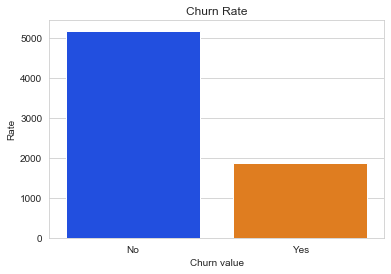

In [15]:
#Plotting the count of churn values
sns.countplot(df['Churn'],palette='bright')
plt.title('Churn Rate')
plt.xlabel('Churn value')
plt.ylabel('Rate');

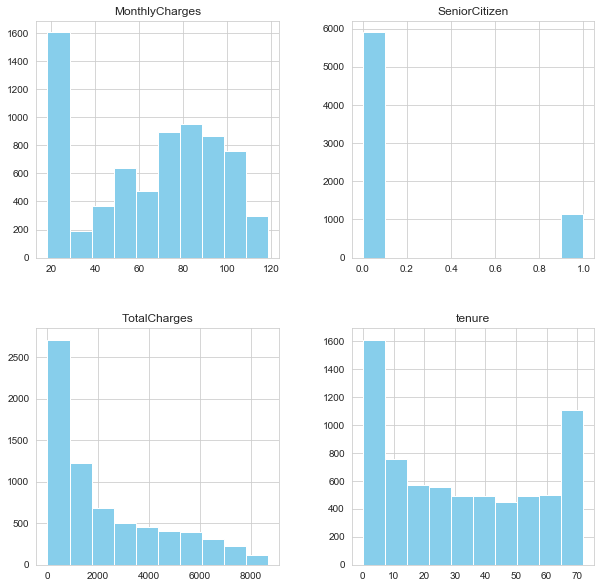

In [16]:
#Histogram plot of all numerical values
df.hist(figsize=(10,10),color='skyblue');

In [17]:
#Label Encoding the data
from sklearn.preprocessing import LabelEncoder
df["churn"] = LabelEncoder().fit_transform(df["Churn"])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [18]:
#Processing Gender column
df_gender = pd.DataFrame(columns=["Gender","Churn (%)"])
i=0
for field in list(df['gender'].unique()):
    ratio = (df[(df['gender']==field)&(df['churn']== 1)].shape[0]) / (df[df["churn"]==1].sum().churn)
    df_gender.loc[i] = (field, ratio*100)
    i += 1
df_plot = df_gender.groupby(by="Gender").sum()
df_gender.sort_values("Gender",inplace=True)
df_gender.head()

,Gender,Churn (%)
0,Female,50.24077
1,Male,49.75923


In [19]:
#Plotting Gender values
px.pie(values=df_plot,names=df['gender'].unique(),title='Churn by Gender (%)')

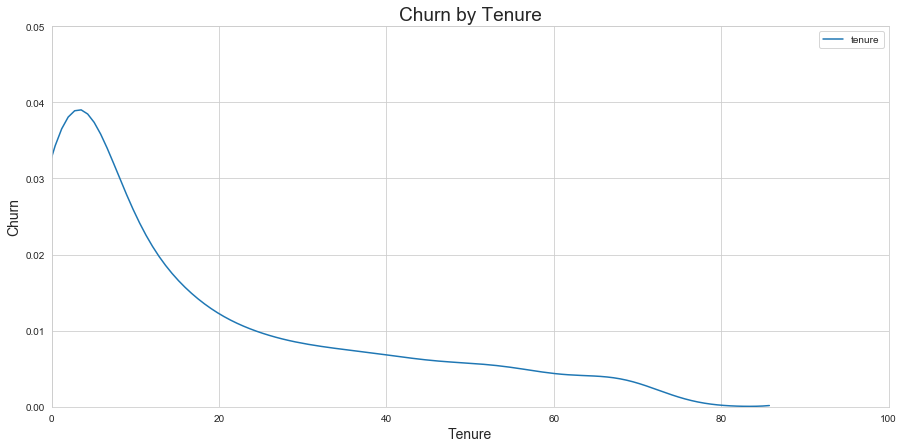

In [20]:
#Plotting the tenure values for churn = Yes
plt.figure(figsize=(15,7))
sns.kdeplot(df.loc[df['Churn'] == 'Yes','tenure'])
plt.style.use('seaborn-bright')
plt.xlim(left=0, right=100)
plt.ylim(bottom=0,top=0.050)
plt.xlabel('Tenure',fontsize=14)
plt.ylabel('Churn',fontsize=14)
plt.title('Churn by Tenure',fontsize=19);

In [21]:
print("Shape of the dataset : {}".format(df.shape))
df.columns

Shape of the dataset : (7043, 21)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'churn'],
      dtype='object')

In [22]:
#Drop object column of churn
df.drop(['Churn'], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


### Outlier Removal


In [23]:
#Getting numerical columns in a list
num = ["tenure","MonthlyCharges","TotalCharges"]

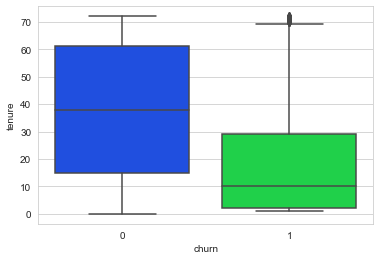

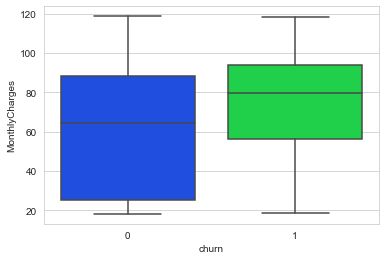

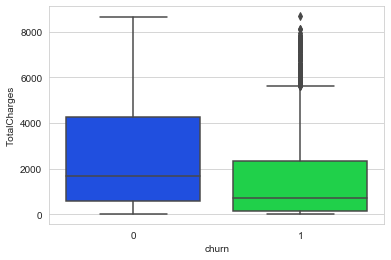

In [24]:
#Plotting the columns
i = 0
for i in  num:
    sns.boxplot(y=df[i],x=df['churn'])
    plt.show()

In [25]:
#Removing outliers using InterQuantile Range for TotalCharges 
x = df["TotalCharges"].quantile(0.15)
y = df["TotalCharges"].quantile(0.85)
df["TotalCharges"]= np.where(df["TotalCharges"]<x,x,df["TotalCharges"])
df["TotalCharges"]= np.where(df["TotalCharges"]>y,y,df["TotalCharges"])

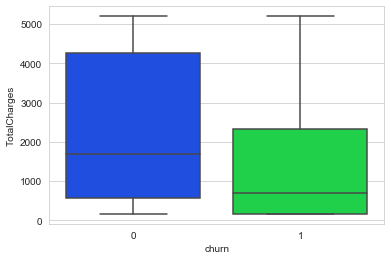

In [26]:
#Plotting the values after oulier Removal
sns.boxplot(y=df["TotalCharges"],x=df['churn'])
plt.show()

In [27]:
#Removing outliers using InterQuantile Range for Tenure
x = df["tenure"].quantile(0.1)
y = df["tenure"].quantile(0.90)
df["tenure"]= np.where(df["tenure"]<x,x,df["tenure"])
df["tenure"]= np.where(df["tenure"]>y,y,df["tenure"])

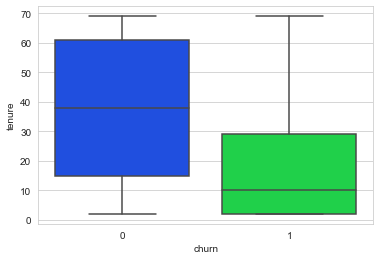

In [28]:
#Plotting the values after oulier Removal
sns.boxplot(y=df["tenure"],x=df['churn'])
plt.show()

In [29]:
df_copy= df.copy()
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn
0,Female,0,Yes,No,2.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,164.895,0
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500,0
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,164.895,1
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750,0
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,164.895,1


### Data Encoding

In [30]:
#Encoding the data using LabelEncoding
from sklearn.preprocessing import LabelEncoder

for column in df_copy.columns:
    if df_copy[column].dtype == np.number:
        continue
    df_copy[column] = LabelEncoder().fit_transform(df_copy[column])
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn
0,0,0,1,0,2.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,164.895,0
1,1,0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.500,0
2,1,0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,164.895,1
3,1,0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.750,0
4,0,0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,164.895,1


In [31]:
#Printing Actual value and encoded value 
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ':' + str(df[column].unique()))
        print("{} :{}\n".format(df[column].unique(),df_copy[column].unique()))
        print('__________________________________________')

gender:['Female' 'Male']
['Female' 'Male'] :[0 1]

__________________________________________
Partner:['Yes' 'No']
['Yes' 'No'] :[1 0]

__________________________________________
Dependents:['No' 'Yes']
['No' 'Yes'] :[0 1]

__________________________________________
PhoneService:['No' 'Yes']
['No' 'Yes'] :[0 1]

__________________________________________
MultipleLines:['No phone service' 'No' 'Yes']
['No phone service' 'No' 'Yes'] :[1 0 2]

__________________________________________
InternetService:['DSL' 'Fiber optic' 'No']
['DSL' 'Fiber optic' 'No'] :[0 1 2]

__________________________________________
OnlineSecurity:['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service'] :[0 2 1]

__________________________________________
OnlineBackup:['Yes' 'No' 'No internet service']
['Yes' 'No' 'No internet service'] :[2 0 1]

__________________________________________
DeviceProtection:['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service'] :[0 2 1]

__________________

### Scaling 

In [32]:
#Scaling using minmax scaling
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range=(0, 5))
col = list(df_copy.columns)
col.remove('churn')
for i in col:
    df_copy[i] = df_copy[i].astype(float)
    df_copy[[i]] = scale.fit_transform(df_copy[[i]])
df_copy['churn']  = pd.to_numeric(df_copy['churn'],downcast='float')
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn
0,0.0,0.0,5.0,0.0,0.000000,0.0,2.5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,3.333333,0.577114,0.000000,0.0
1,5.0,0.0,0.0,0.0,2.388060,5.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,2.5,0.0,5.000000,1.925373,1.714118,0.0
2,5.0,0.0,0.0,0.0,0.000000,5.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,5.000000,1.771144,0.000000,1.0
3,5.0,0.0,0.0,0.0,3.208955,0.0,2.5,0.0,5.0,0.0,5.0,5.0,0.0,0.0,2.5,0.0,0.000000,1.196517,1.665664,0.0
4,0.0,0.0,0.0,0.0,0.000000,5.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.333333,2.609453,0.000000,1.0


In [33]:
#Splitting up data
X=df_copy.drop('churn',axis=1)
y=df_copy['churn']

### Feature Selection 

In [34]:
#Using chi-square method for feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

best_features = SelectKBest(score_func=chi2,k=15)
fit = best_features.fit(X, y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
feature_scores = pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns = ['Feature','Score']
feature_scores.sort_values('Score',ascending=False).head(25)

,Feature,Score
14,Contract,2789.450417
8,OnlineSecurity,1379.028823
11,TechSupport,1308.259665
4,tenure,1244.857177
1,SeniorCitizen,671.757724
3,Dependents,665.182214
9,OnlineBackup,575.216300
15,PaperlessBilling,528.404315
18,TotalCharges,515.143791
10,DeviceProtection,478.257849


In [35]:
#Removing unrequired columns from the dataset
X = df_copy.drop(["churn","PhoneService","gender","StreamingTV","StreamingMovies","MultipleLines","InternetService","PaymentMethod"],axis=1)
y = df_copy['churn']
z = pd.concat([X,y],axis=1) 
z.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,churn
0,0.0,5.0,0.0,0.000000,0.0,5.0,0.0,0.0,0.0,5.0,0.577114,0.000000,0.0
1,0.0,0.0,0.0,2.388060,5.0,0.0,5.0,0.0,2.5,0.0,1.925373,1.714118,0.0
2,0.0,0.0,0.0,0.000000,5.0,5.0,0.0,0.0,0.0,5.0,1.771144,0.000000,1.0
3,0.0,0.0,0.0,3.208955,5.0,0.0,5.0,5.0,2.5,0.0,1.196517,1.665664,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,5.0,2.609453,0.000000,1.0


In [36]:
#Train - Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 )
X_train.shape,y_train.shape

((5634, 12), (5634,))

0.0    4138
1.0    1496
Name: churn, dtype: int64


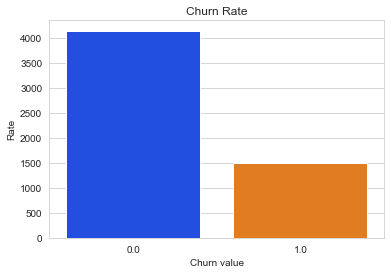

In [37]:
#Plotting the churn values
print(y_train.value_counts())
sns.countplot(y_train,palette='bright')
plt.title('Churn Rate')
plt.xlabel('Churn value')
plt.ylabel('Rate');

### Data Sampling 

In [38]:
#importing SMOTE for sampling
from imblearn.over_sampling import SMOTE
unique,count = np.unique(y_train,return_counts=True)
y_train_dvc = {k:v for (k,v) in zip(unique,count)}
y_train_dvc

{0.0: 4138, 1.0: 1496}

In [39]:
#Sampling the data
sm = SMOTE()
X_resampled, y_resampled = sm.fit_sample(X_train,y_train)

1.0    4138
0.0    4138
Name: churn, dtype: int64


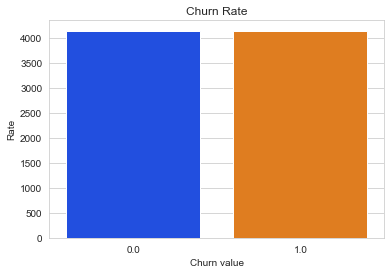

In [40]:
#Plotting the resampled churn values
print(y_resampled.value_counts())
sns.countplot(y_resampled,palette='bright')
plt.title('Churn Rate')
plt.xlabel('Churn value')
plt.ylabel('Rate');

## Data Modelling

### Logistic regression

In [41]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
#logmodel.fit(X_resampled,y_resampled)
#predictions_lr = logmodel.predict(X_test)

In [42]:
#from sklearn.metrics import classification_report,confusion_matrix
#print(confusion_matrix(y_resampled,logmodel.predict(X_resampled)))
#print('______________________________________________________')
#print(classification_report(y_resampled,logmodel.predict(X_resampled)))

In [43]:
#from sklearn.metrics import classification_report,confusion_matrix
#print(confusion_matrix(y_test,predictions_lr))
#print('______________________________________________________')
#print(classification_report(y_test,predictions_lr))

In [44]:
logmodel.fit(X_train,y_train)
predictions_lr = logmodel.predict(X_test)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix
print("\n")
print("TRAINING DATA")
print('*************')
print("\n")
print(confusion_matrix(y_train,logmodel.predict(X_train)))
print('______________________________________________________')
print(classification_report(y_train,logmodel.predict(X_train)))



TRAINING DATA
*************


[[3693  445]
 [ 680  816]]
______________________________________________________
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      4138
         1.0       0.65      0.55      0.59      1496

    accuracy                           0.80      5634
   macro avg       0.75      0.72      0.73      5634
weighted avg       0.79      0.80      0.79      5634



In [46]:
from sklearn.metrics import classification_report,confusion_matrix
print("\n")
print("TRAINING DATA")
print('*************')
print("\n")
print(confusion_matrix(y_train,logmodel.predict(X_train)))
print('______________________________________________________')
print(classification_report(y_train,logmodel.predict(X_train)))



TRAINING DATA
*************


[[3693  445]
 [ 680  816]]
______________________________________________________
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      4138
         1.0       0.65      0.55      0.59      1496

    accuracy                           0.80      5634
   macro avg       0.75      0.72      0.73      5634
weighted avg       0.79      0.80      0.79      5634



### Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')
dtree = dtree.fit(X_train,y_train)
predictions_dt = dtree.predict(X_test)

In [48]:
from sklearn.metrics import classification_report,confusion_matrix
print("\n")
print("TRAINING DATA")
print('*************')
print("\n")
print(confusion_matrix(y_train,dtree.predict(X_train)))
print('______________________________________________________')
print(classification_report(y_train,dtree.predict(X_train)))



TRAINING DATA
*************


[[4134    4]
 [  36 1460]]
______________________________________________________
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4138
         1.0       1.00      0.98      0.99      1496

    accuracy                           0.99      5634
   macro avg       0.99      0.99      0.99      5634
weighted avg       0.99      0.99      0.99      5634



In [49]:
from sklearn.metrics import classification_report,confusion_matrix
print("\n")
print("TEST DATA")
print('*************')
print("\n")
print(confusion_matrix(y_test,predictions_dt))
print('______________________________________________________')
print(classification_report(y_test,predictions_dt))



TEST DATA
*************


[[863 173]
 [184 189]]
______________________________________________________
              precision    recall  f1-score   support

         0.0       0.82      0.83      0.83      1036
         1.0       0.52      0.51      0.51       373

    accuracy                           0.75      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.74      0.75      0.75      1409



### Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(min_samples_split=8)
rfc.fit(X_train,y_train)
predictions_rfc = rfc.predict(X_test)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix
print("\n")
print("TRAINING DATA")
print('*************')
print("\n")
print(confusion_matrix(y_train,rfc.predict(X_train)))
print('______________________________________________________')
print(classification_report(y_train,rfc.predict(X_train)))



TRAINING DATA
*************


[[4023  115]
 [ 363 1133]]
______________________________________________________
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      4138
         1.0       0.91      0.76      0.83      1496

    accuracy                           0.92      5634
   macro avg       0.91      0.86      0.88      5634
weighted avg       0.91      0.92      0.91      5634



In [52]:
from sklearn.metrics import classification_report,confusion_matrix
print("\n")
print("TEST DATA")
print('*************')
print("\n")
print(confusion_matrix(y_test,predictions_rfc))
print('______________________________________________________')
print(classification_report(y_test,predictions_rfc))



TEST DATA
*************


[[945  91]
 [198 175]]
______________________________________________________
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1036
         1.0       0.66      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



### Support Vector Classifier

In [53]:
from sklearn.svm import SVC

In [54]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.762, total=   2.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.766, total=   2.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.754, total=   2.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.762, total=   2.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.761, total=   2.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.775, total=   1.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.777, total=   1.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.764, total=   1.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.778, total=   1.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.783, total=   1.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.796, total=   1.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.775, total=   1.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.785, total=   1.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.774, total=   1.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.801, total=   0.9s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.797, total=   0.9s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.788, total=   3.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.771, total=   2.8s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.801, total=   1.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.797, total=   1.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.776, total=   1.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.788, total=   1.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.778, total=   1.2s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  6.6min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [55]:
grid.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [56]:
svc_ = SVC(C=100,gamma=0.0001)
svc_.fit(X_train,y_train)
predictions_svc = svc_.predict(X_test)

In [57]:
from sklearn.metrics import classification_report,confusion_matrix
print("\n")
print("TRAINING DATA")
print('*************')
print("\n")
print(confusion_matrix(y_train,svc_.predict(X_train)))
print('______________________________________________________')
print(classification_report(y_train,svc_.predict(X_train)))



TRAINING DATA
*************


[[3706  432]
 [ 721  775]]
______________________________________________________
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      4138
         1.0       0.64      0.52      0.57      1496

    accuracy                           0.80      5634
   macro avg       0.74      0.71      0.72      5634
weighted avg       0.79      0.80      0.79      5634



In [58]:
from sklearn.metrics import classification_report,confusion_matrix
print("\n")
print("TEST DATA")
print('*************')
print("\n")
print(confusion_matrix(y_test,predictions_svc))
print('______________________________________________________')
print(classification_report(y_test,predictions_svc))



TEST DATA
*************


[[939  97]
 [174 199]]
______________________________________________________
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      1036
         1.0       0.67      0.53      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



### K-Neighbours Classifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

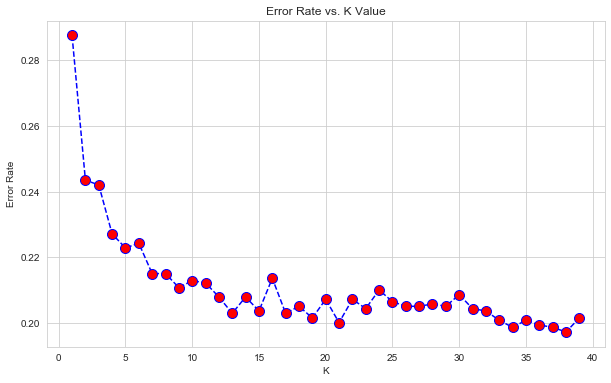

In [61]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

In [62]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
predictions_knn = knn.predict(X_test)

In [63]:
from sklearn.metrics import classification_report,confusion_matrix
print("\n")
print("TRAINING DATA")
print('*************')
print("\n")
print(confusion_matrix(y_train,knn.predict(X_train)))
print('______________________________________________________')
print(classification_report(y_train,knn.predict(X_train)))



TRAINING DATA
*************


[[3803  335]
 [ 663  833]]
______________________________________________________
              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88      4138
         1.0       0.71      0.56      0.63      1496

    accuracy                           0.82      5634
   macro avg       0.78      0.74      0.75      5634
weighted avg       0.81      0.82      0.82      5634



In [64]:
from sklearn.metrics import classification_report,confusion_matrix
print("\n")
print("TEST DATA")
print('*************')
print("\n")
print(confusion_matrix(y_test,predictions_knn))
print('______________________________________________________')
print(classification_report(y_test,predictions_knn))



TEST DATA
*************


[[938  98]
 [199 174]]
______________________________________________________
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86      1036
         1.0       0.64      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



### Naive Bayes

In [65]:
from sklearn.naive_bayes import MultinomialNB

In [66]:
param_grid = {'alpha':[1,2,3,4,5,6,7,8,9,10]}
grid = GridSearchCV(MultinomialNB(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] alpha=1 .........................................................
[CV] ............................. alpha=1, score=0.756, total=   0.1s
[CV] alpha=1 .........................................................
[CV] ............................. alpha=1, score=0.770, total=   0.0s
[CV] alpha=1 .........................................................
[CV] ............................. alpha=1, score=0.746, total=   0.0s
[CV] alpha=1 .........................................................
[CV] ............................. alpha=1, score=0.756, total=   0.0s
[CV] alpha=1 .........................................................
[CV] ............................. alpha=1, score=0.738, total=   0.0s
[CV] alpha=2 .........................................................
[CV] ............................. alpha=2, score=0.756, total=   0.0s
[CV] alpha=2 .........................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] ............................. alpha=3, score=0.756, total=   0.0s
[CV] alpha=3 .........................................................
[CV] ............................. alpha=3, score=0.770, total=   0.0s
[CV] alpha=3 .........................................................
[CV] ............................. alpha=3, score=0.746, total=   0.0s
[CV] alpha=3 .........................................................
[CV] ............................. alpha=3, score=0.756, total=   0.0s
[CV] alpha=3 .........................................................
[CV] ............................. alpha=3, score=0.738, total=   0.0s
[CV] alpha=4 .........................................................
[CV] ............................. alpha=4, score=0.756, total=   0.0s
[CV] alpha=4 .........................................................
[CV] ............................. alpha=4, score=0.770, total=   0.0s
[CV] alpha=4 .........................................................
[CV] 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished


GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, verbose=3)

In [67]:
grid.best_params_

{'alpha': 8}

In [68]:
nbc = MultinomialNB(alpha=8)
nbc.fit(X_train,y_train)
predictions_nbc = nbc.predict(X_test)

In [69]:
from sklearn.metrics import classification_report,confusion_matrix
print("\n")
print("TRAINING DATA")
print('*************')
print("\n")
print(confusion_matrix(y_train,nbc.predict(X_train)))
print('______________________________________________________')
print(classification_report(y_train,nbc.predict(X_train)))



TRAINING DATA
*************


[[3199  939]
 [ 449 1047]]
______________________________________________________
              precision    recall  f1-score   support

         0.0       0.88      0.77      0.82      4138
         1.0       0.53      0.70      0.60      1496

    accuracy                           0.75      5634
   macro avg       0.70      0.74      0.71      5634
weighted avg       0.78      0.75      0.76      5634



In [70]:
from sklearn.metrics import classification_report,confusion_matrix
print("\n")
print("TEST DATA")
print('*************')
print("\n")
print(confusion_matrix(y_test,predictions_nbc))
print('______________________________________________________')
print(classification_report(y_test,predictions_nbc))



TEST DATA
*************


[[823 213]
 [117 256]]
______________________________________________________
              precision    recall  f1-score   support

         0.0       0.88      0.79      0.83      1036
         1.0       0.55      0.69      0.61       373

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.77      0.77      1409



### XG Boost

In [71]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=4)
xgb.fit(X_train,y_train)
predictions_xgb = xgb.predict(X_test)

In [72]:
from sklearn.metrics import classification_report,confusion_matrix
print("\n")
print("TRAINING DATA")
print('*************')
print("\n")
print(confusion_matrix(y_train,xgb.predict(X_train)))
print('______________________________________________________')
print(classification_report(y_train,xgb.predict(X_train)))



TRAINING DATA
*************


[[3807  331]
 [ 622  874]]
______________________________________________________
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89      4138
         1.0       0.73      0.58      0.65      1496

    accuracy                           0.83      5634
   macro avg       0.79      0.75      0.77      5634
weighted avg       0.82      0.83      0.82      5634



In [73]:
from sklearn.metrics import classification_report,confusion_matrix
print("\n")
print("TEST DATA")
print('*************')
print("\n")
print(confusion_matrix(y_test,predictions_xgb))
print('______________________________________________________')
print(classification_report(y_test,predictions_xgb))



TEST DATA
*************


[[951  85]
 [177 196]]
______________________________________________________
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      1036
         1.0       0.70      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409

